# 1/ Import thư viện và kiểm tra Data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
!pip install mlxtend

In [ ]:
link = 'https://drive.google.com/file/d/1y2KcT_oJPcXQHS_x7BiDK5-BRW6xz9GV/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
link = 'https://drive.google.com/file/d/1Q58HV6tjWeySXObeId2HdpCn_HhzdRwy/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df1 = pd.read_csv(path)

In [ ]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [ ]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
1,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
3,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800
4,2017-11-14,1.68928,1.73537,1.56827,1.59258,1.59258,7829600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     2441 non-null   object 
 1   Open                          2441 non-null   float64
 2   High                          2441 non-null   float64
 3   Low                           2441 non-null   float64
 4   Close                         2441 non-null   float64
 5   Volume                        2441 non-null   float64
 6   Close time                    2441 non-null   object 
 7   Quote asset volume            2441 non-null   float64
 8   Number of trades              2441 non-null   int64  
 9   Taker buy base asset volume   2441 non-null   float64
 10  Taker buy quote asset volume  2441 non-null   float64
 11  Ignore                        2441 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 229.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2.441000e+03,2.441000e+03,2441.000000,2.441000e+03,2441.0
mean,25638.038853,26260.692028,24956.096841,25654.639590,73408.989955,1.772412e+09,1.553325e+06,36497.579067,8.779873e+08,0.0
std,19297.930055,19749.548732,18797.122543,19305.127701,82138.435643,2.018030e+09,1.938675e+06,40870.927556,1.002992e+09,0.0
min,3211.710000,3276.500000,3156.260000,3211.720000,1521.537318,1.177017e+07,1.241700e+04,844.258813,6.532639e+06,0.0
25%,8778.580000,8999.950000,8523.550000,8778.570000,31022.118530,3.669664e+08,3.991270e+05,15579.303258,1.834895e+08,0.0
50%,20295.110000,20868.480000,19854.920000,20337.820000,46289.384910,1.053601e+09,9.446900e+05,23046.711740,5.124108e+08,0.0
75%,39942.370000,40959.880000,38690.000000,39961.090000,76649.126960,2.482639e+09,1.743013e+06,37825.501493,1.237800e+09,0.0
max,73072.400000,73777.000000,71333.310000,73072.410000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09,0.0


In [ ]:
#check null & duplicate
df.isnull().sum()

,0
Open time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Close time,0
Quote asset volume,0
Number of trades,0
Taker buy base asset volume,0


In [ ]:
df1.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df1.duplicated().sum()

0

In [ ]:
#check if the column ['Open time'] is a continuous, unbroken series of days

# Convert 'Open time' to datetime objects
df['Open time'] = pd.to_datetime(df['Open time'])

# Sort the DataFrame by 'Open time'
df = df.sort_values('Open time')

# Check if the 'Open time' column is a continuous series of days
expected_dates = pd.date_range(start=df['Open time'].min(), end=df['Open time'].max(), freq='D')
actual_dates = df['Open time'].unique()

if set(expected_dates) == set(actual_dates):
  print("The 'Open time' column is a continuous series of days from 2018 to 2024.")
else:
  print("The 'Open time' column is not a continuous series of days.")
  missing_dates = set(expected_dates) - set(actual_dates)
  print("Missing dates:", missing_dates)


The 'Open time' column is a continuous series of days from 2018 to 2024.


In [ ]:
#Trung bình của biến
mean_close_price = df['Close'].mean()
mean_open_price = df['Open'].mean()
mean_high_price = df['High'].mean()
mean_low_price = df['Low'].mean()

mean_prices = pd.DataFrame({
    'Price Type': ['Close', 'Open', 'High', 'Low'],
    'Mean Price': [mean_close_price, mean_open_price, mean_high_price, mean_low_price]
})

mean_prices.style.background_gradient(cmap='Oranges')

,Price Type,Mean Price
0,Close,25654.639590
1,Open,25638.038853
2,High,26260.692028
3,Low,24956.096841


# 2/ EDA

In [ ]:
df['Open time'] = pd.to_datetime(df['Open time'])

In [ ]:
df.set_index('Open time', inplace=True)

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

# 3/ ARIMA

In [ ]:
!pip install prophet

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.4 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import datetime

In [ ]:
df.sort_values("Open time")

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-02,57301.77,59425.69,57128.00,59132.13,22895.014610,2024-09-02 23:59:59.999,1.333092e+09,1966119,11295.254520,6.574966e+08,0
2024-09-03,59132.12,59809.65,57415.00,57487.73,22828.184470,2024-09-03 23:59:59.999,1.335077e+09,2208758,10979.792040,6.422527e+08,0
2024-09-04,57487.74,58519.00,55606.00,57970.90,35560.821460,2024-09-04 23:59:59.999,2.027631e+09,3177549,16861.754830,9.619232e+08,0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


In [ ]:
data = df[['Close']]
data

,Close
Open time,
2018-01-01,13380.00
2018-01-02,14675.11
2018-01-03,14919.51
2018-01-04,15059.54
2018-01-05,16960.39
...,...
2024-09-02,59132.13
2024-09-03,57487.73
2024-09-04,57970.90


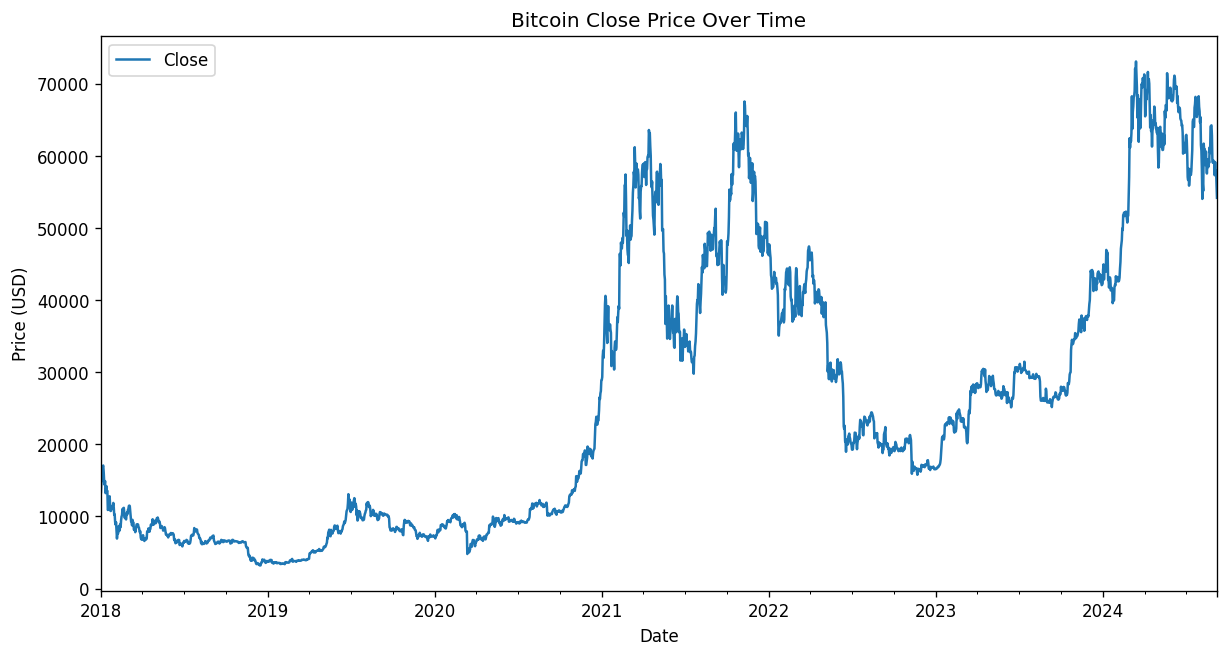

In [ ]:
data.plot(figsize=(12,6))
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [ ]:
data1 = data.diff()
data1

,Close
Open time,
2018-01-01,NaN
2018-01-02,1295.11
2018-01-03,244.40
2018-01-04,140.03
2018-01-05,1900.85
...,...
2024-09-02,1830.27
2024-09-03,-1644.40
2024-09-04,483.17


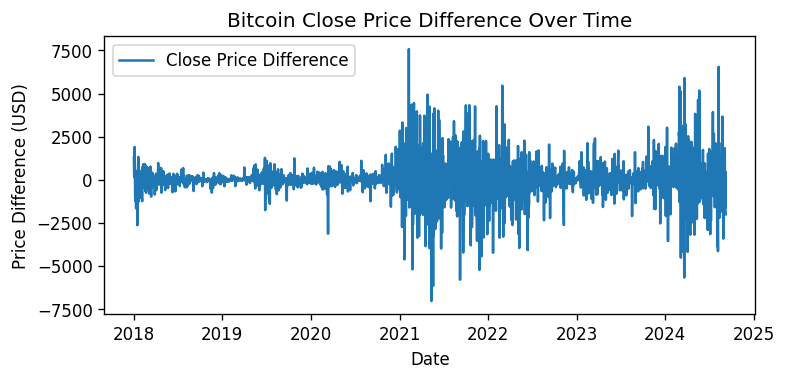

In [ ]:
plt.plot(data1['Close'], label = 'Close Price Difference')
plt.title('Bitcoin Close Price Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference (USD)')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, indicating it is non-stationary")

adfuller_test(data['Close'].dropna())

ADF Test Statistic : -1.2400963540609395
p-value : 0.6561139413671793
#Lags Used : 27
Number of Observations : 2413
Weak evidence against null hypothesis, indicating it is non-stationary


In [ ]:
adfuller_test(data1.dropna())

ADF Test Statistic : -7.9066705957004695
p-value : 4.049357871398166e-12
#Lags Used : 27
Number of Observations : 2412
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
data['Close Price First Difference'] = data['Close'] - data['Close'].shift(1)
data['Seasonal First Difference'] = data['Close'] - data['Close'].shift(12)
data.head()

<ipython-input-30-81d3354f66cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close Price First Difference'] = data['Close'] - data['Close'].shift(1)
<ipython-input-30-81d3354f66cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Seasonal First Difference'] = data['Close'] - data['Close'].shift(12)


,Close,Close Price First Difference,Seasonal First Difference
Open time,,,
2018-01-01,13380.00,NaN,NaN
2018-01-02,14675.11,1295.11,NaN
2018-01-03,14919.51,244.40,NaN
2018-01-04,15059.54,140.03,NaN
2018-01-05,16960.39,1900.85,NaN


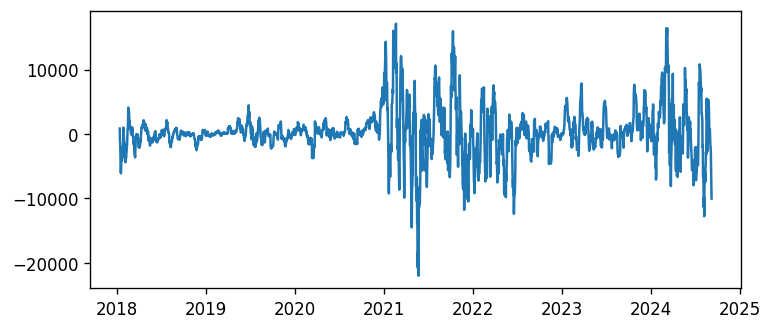

In [ ]:
plt.plot(data['Seasonal First Difference'])

In [ ]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.746193099328258
p-value : 3.0308173821842978e-09
#Lags Used : 27
Number of Observations : 2401
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


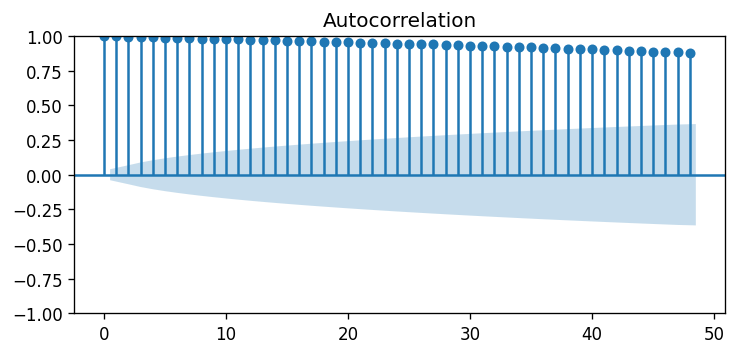

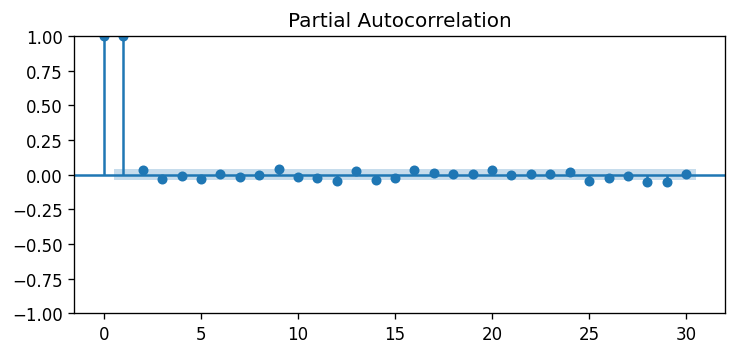

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 0 Differencing
plot_acf(data['Close'].dropna(), lags=48) #<=> MA =0
plot_pacf(data['Close'].dropna(), lags=30) #<=> AR
plt.show()

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm

model = pm.auto_arima(data['Close'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=40982.487, Time=3.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=40986.881, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=40981.134, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=40981.473, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=40985.473, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=40982.108, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=40982.271, Time=10.64 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=40979.808, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=40980.749, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=40981.112, Time=2.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=40980.149, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=40981.853, Time=7.21 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 27.022 seconds
                               SARIMAX Results                            

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'],order = (1,1,0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2441
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -20487.904
Date:                Fri, 11 Oct 2024   AIC                          40979.808
Time:                        14:55:45   BIC                          40991.408
Sample:                    01-01-2018   HQIC                         40984.025
                         - 09-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0555      0.013     -4.404      0.000      -0.080      -0.031
sigma2       1.15e+06   1.47e+04     78.366      0.000    1.12e+06    1.18e+06
Ljung-Box (L1) (Q):                   0.03   Jarque-

In [ ]:
# train test split
size = int(len(data) - 40)
train, test = data['Close'][0:size], data['Close'][size:len(data)]


history = [x for x in train]
predictions = []

# Dự báo 1 step
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))

<ipython-input-37-7dc847b0575c>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 68231.121139, expected = 66784.690000
predicted = 66862.743608, expected = 66188.000000
predicted = 66219.569467, expected = 64628.000000
predicted = 64709.986972, expected = 65354.020000
predicted = 65315.593999, expected = 61498.330000
predicted = 61706.290146, expected = 60697.990000
predicted = 60740.016233, expected = 58161.000000
predicted = 58292.285790, expected = 54018.810000
predicted = 54216.675140, expected = 56022.010000
predicted = 55920.880897, expected = 55134.160000
predicted = 55179.490138, expected = 61685.990000
predicted = 61337.996960, expected = 60837.990000
predicted = 60884.023198, expected = 60923.510000
predicted = 60918.866485, expected = 58712.590000
predicted = 58832.778710, expected = 59346.640000
predicted = 59311.914945, expected = 60587.150000
predicted = 60519.568865, expected = 58683.390000
predicted = 58788.644468, expected = 57541.060000
predicted = 57603.251367, expected = 58874.600000
predicted = 58801.310752, expected = 59491.990000


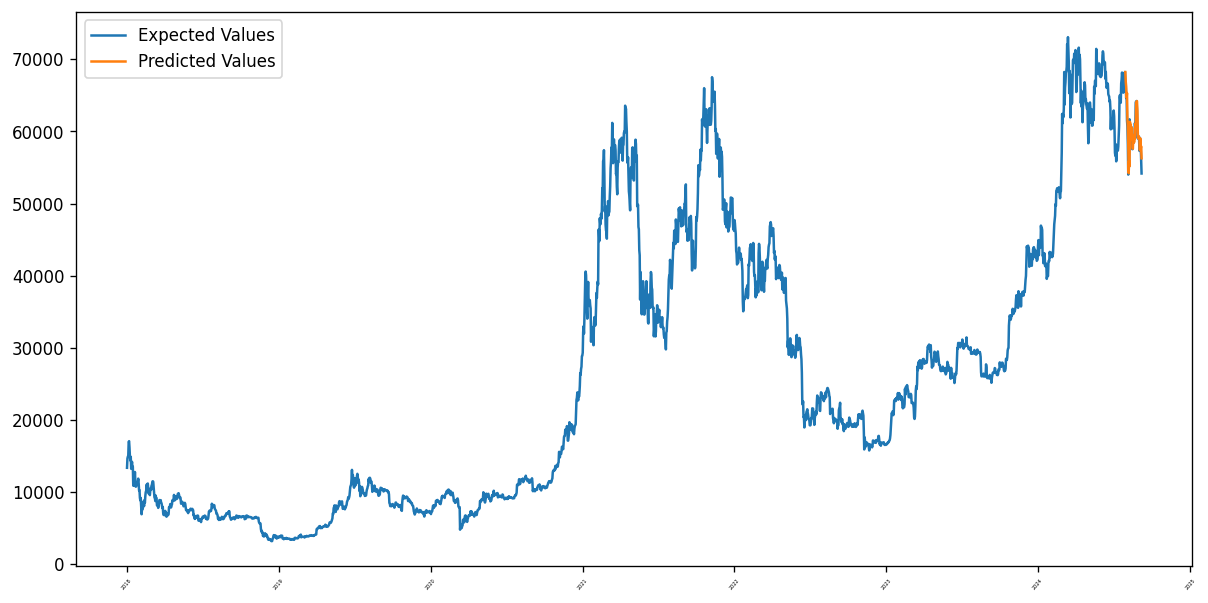

In [ ]:
predictions_series = pd.Series(predictions, index = test.index)
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(data['Close'], label = 'Expected Values')
plt.plot(predictions_series, label = 'Predicted Values');
plt.legend(loc="upper left")
plt.xticks(rotation=50, fontsize=3)
plt.show()

predicted = 68231.121139, expected = 66784.690000
predicted = 66862.743608, expected = 66188.000000
predicted = 66219.569467, expected = 64628.000000
predicted = 64709.986972, expected = 65354.020000
predicted = 65315.593999, expected = 61498.330000
predicted = 61706.290146, expected = 60697.990000
predicted = 60740.016233, expected = 58161.000000
predicted = 58292.285790, expected = 54018.810000
predicted = 54216.675140, expected = 56022.010000
predicted = 55920.880897, expected = 55134.160000
predicted = 55179.490138, expected = 61685.990000
predicted = 61337.996960, expected = 60837.990000
predicted = 60884.023198, expected = 60923.510000
predicted = 60918.866485, expected = 58712.590000
predicted = 58832.778710, expected = 59346.640000
predicted = 59311.914945, expected = 60587.150000
predicted = 60519.568865, expected = 58683.390000
predicted = 58788.644468, expected = 57541.060000
predicted = 57603.251367, expected = 58874.600000
predicted = 58801.310752, expected = 59491.990000


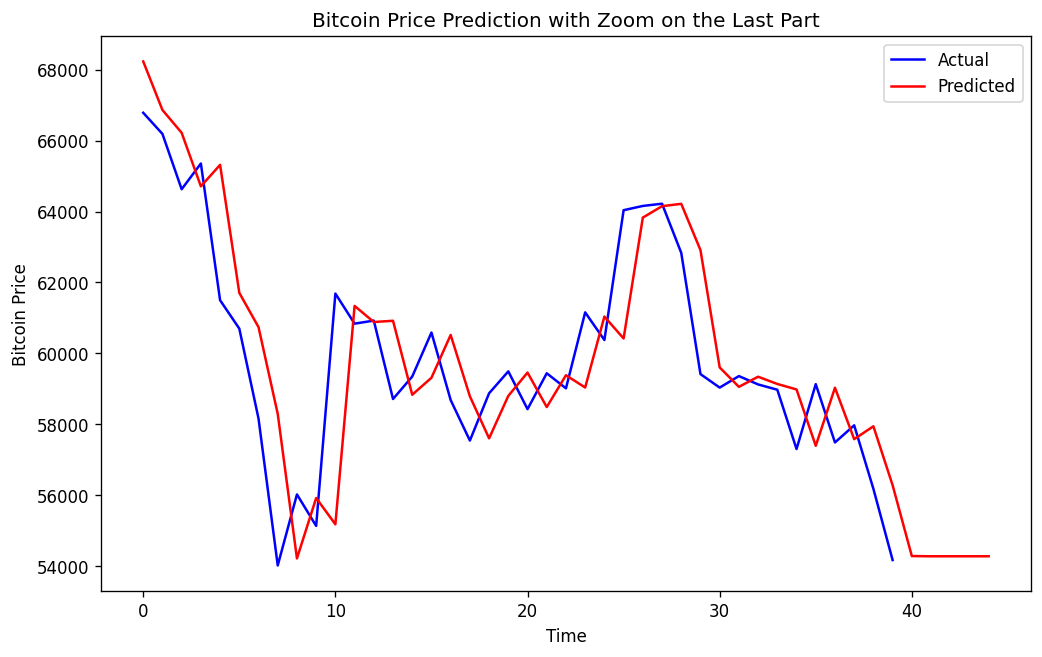

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

history = [x for x in train]
test = [x for x in test]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()

    # Dự đoán giá trị tiếp theo
    yhat = model_fit.forecast()[0]
    predictions.append(float(yhat))

    # Lưu quan sát thực tế
    obs = test[t]
    history.append(obs)

    print('predicted = %f, expected = %f' % (yhat, obs))

# Dự đoán thêm n_steps vào tương lai sau khi hết tập kiểm tra
n_steps = 5
model = ARIMA(history, order=(1, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=n_steps)

predictions.extend(forecast)

plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')

plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Prediction with Zoom on the Last Part')
plt.legend()
plt.show()


In [ ]:
predictions = model_fit.forecast(len(test))

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R2 score: %.2f'% r2_score(test, predictions))
print('Mean squared error score: %.2f'% mean_squared_error(test, predictions))
print('Test RMSE: %.2f'% np.sqrt(mean_squared_error(test,predictions)))

R2 score: -3.48
Mean squared error score: 41051662.30
Test RMSE: 6407.16


In [ ]:
close_prices = df['Close']

# Chọn thời điểm mua
buy_date_index = 2440
buy_price = close_prices[buy_date_index]

# Sử dụng dữ liệu trước thời điểm mua để huấn luyện mô hình
train_data = close_prices[:buy_date_index]

# Xây dựng mô hình ARIMA để dự đoán giá trị trong tương lai
model = ARIMA(train_data, order=(1,1,0))
model_fit = model.fit()

# Dự đoán giá trị tương lai
future_steps = 30
forecast = model_fit.forecast(steps=future_steps)
forecast_dates = pd.date_range(start=close_prices.index[buy_date_index], periods=future_steps+1, freq='D')[1:]

forecast_df = pd.DataFrame({'date': forecast_dates, 'forecasted_close': forecast})
forecast_df.set_index('date', inplace=True)

print(f"Giá mua tại thời điểm {close_prices.index[buy_date_index]}: {buy_price}")
print(f"Dự đoán giá 30 ngày sau khi mua: \n", forecast_df)


<ipython-input-42-1b041696a964>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_price = close_prices[buy_date_index]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Giá mua tại thời điểm 2024-09-06 00:00:00: 54172.45
Dự đoán giá 30 ngày sau khi mua: 
             forecasted_close
date                        
2024-09-07      56281.824439
2024-09-08      56276.035050
2024-09-09      56276.364215
2024-09-10      56276.345500
2024-09-11      56276.346564
2024-09-12      56276.346503
2024-09-13      56276.346507
2024-09-14      56276.346507
2024-09-15      56276.346507
2024-09-16      56276.346507
2024-09-17      56276.346507
2024-09-18      56276.346507
2024-09-19      56276.346507
2024-09-20      56276.346507
2024-09-21      56276.346507
2024-09-22      56276.346507
2024-09-23      56276.346507
2024-09-24      56276.346507
2024-09-25      56276.346507
2024-09-26      56276.346507
2024-09-27      56276.346507
2024-09-28      56276.346507
2024-09-29      56276.346507
2024-09-30      56276.346507
2024-10-01      56276.346507
2024-10-02      56276.346507
2024-10-03      56276.346507
2024-10-04      56276.346507
2024-10-05      56276.346507
2024-10-06    

In [ ]:
# Giá dự đoán sau 30 ngày
predicted_price = forecast_df['forecasted_close'].iloc[-1]

# Tính toán lợi nhuận/lỗ
profit_loss = predicted_price - buy_price

# Hiển thị kết quả
if profit_loss > 0:
    print(f"Lời: {profit_loss:.2f} USD sau 30 ngày")
else:
    print(f"Lỗ: {abs(profit_loss):.2f} USD sau 30 ngày")


Lời: 2103.90 USD sau 30 ngày


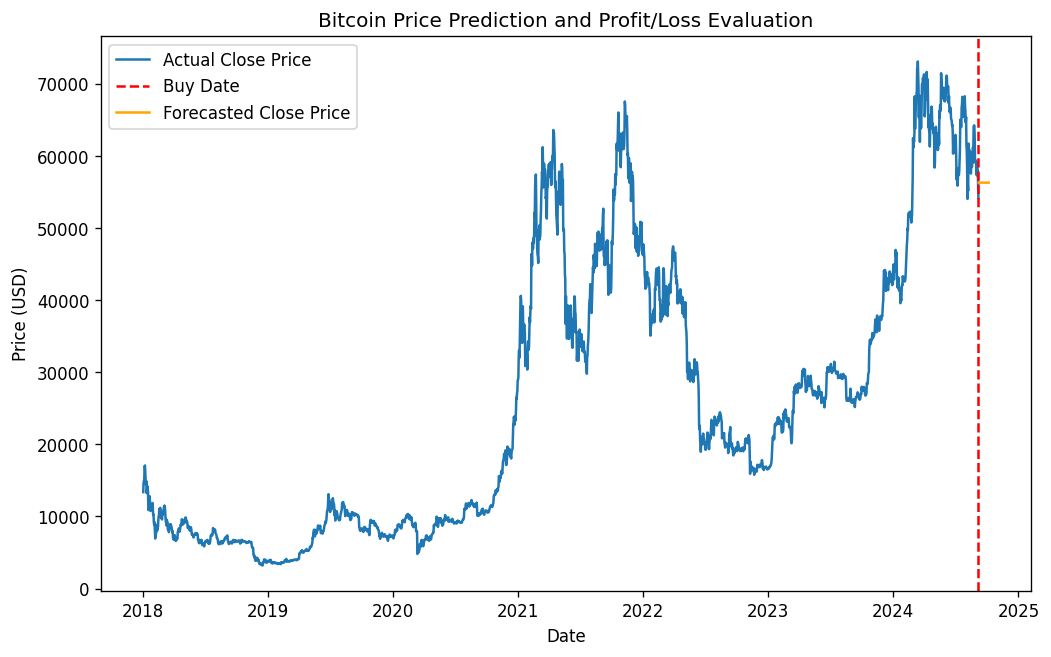

In [ ]:
# Vẽ biểu đồ giá
plt.figure(figsize=(10, 6))
plt.plot(close_prices.index, close_prices, label='Actual Close Price')
plt.axvline(x=close_prices.index[buy_date_index], color='red', linestyle='--', label='Buy Date')

# Vẽ giá dự đoán
plt.plot(forecast_df.index, forecast_df['forecasted_close'], label='Forecasted Close Price', color='orange')

# Chú thích và tiêu đề
plt.title('Bitcoin Price Prediction and Profit/Loss Evaluation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Hiển thị biểu đồ
plt.show()


LINEAR REGRESSION MODEL

In [ ]:
# Tạo các cột mục tiêu cho các ngày dự đoán tiếp theo
df['Close2'] = df.Close.shift(-1)
df['Close3'] = df.Close.shift(-2)
df['Close4'] = df.Close.shift(-3)
df['Close5'] = df.Close.shift(-4)
df['Close6'] = df.Close.shift(-5)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,Close2,Close3,Close4,Close5,Close6
Open time,,,,,,,,,,,,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0,14675.11,14919.51,15059.54,16960.39,17069.79
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0,14919.51,15059.54,16960.39,17069.79,16150.03
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0,15059.54,16960.39,17069.79,16150.03,14902.54
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0,16960.39,17069.79,16150.03,14902.54,14400.00
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0,17069.79,16150.03,14902.54,14400.00,14907.09


In [ ]:
# Các cột đặc trưng
features = ['Volume', 'Number of trades', 'Taker buy quote asset volume','Quote asset volume']

# Tạo danh sách mục tiêu cho các ngày dự đoán khác nhau
targets = ['Close2', 'Close3', 'Close4', 'Close5', 'Close6']

# Kiểm tra dữ liệu
print(df[features + targets].isnull().sum())


Volume                          0
Number of trades                0
Taker buy quote asset volume    0
Quote asset volume              0
Close2                          1
Close3                          2
Close4                          3
Close5                          4
Close6                          5
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Lặp qua từng mục tiêu và huấn luyện mô hình
for target in targets:
    print(f"Training model to predict {target}")

    # Lấy dữ liệu đặc trưng (X) và mục tiêu (y)
    X = df[features]
    y = df[target]

    # Bỏ các hàng có giá trị NaN (do sử dụng shift tạo ra NaN)
    valid_rows = ~y.isna()
    X, y = X[valid_rows], y[valid_rows]

    # Chuẩn hóa dữ liệu
    scaler_standard = StandardScaler()
    X_standardized = scaler_standard.fit_transform(X)

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

    # Tạo mô hình hồi quy tuyến tính
    model = LinearRegression()

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán giá trị trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # In kết quả đánh giá
    print(f"Results for {target}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}\n")


Training model to predict Close2
Results for Close2:
MSE: 139056140.8476264
RMSE: 11792.206784466865
MAE: 7904.344609541559
R2: 0.6172691677002228

Training model to predict Close3
Results for Close3:
MSE: 125278512.02376951
RMSE: 11192.788393593864
MAE: 7843.369927554638
R2: 0.6350768929827351

Training model to predict Close4
Results for Close4:
MSE: 124797022.5754394
RMSE: 11171.258773094436
MAE: 7731.591603343411
R2: 0.6490680062705974

Training model to predict Close5
Results for Close5:
MSE: 129430064.07979965
RMSE: 11376.733453843402
MAE: 8057.653391168241
R2: 0.6549630504417597

Training model to predict Close6
Results for Close6:
MSE: 123024757.59209046
RMSE: 11091.652608700404
MAE: 7748.4994086976385
R2: 0.67167473143702



In [ ]:
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_df

NameError: name 'X_normalized' is not defined

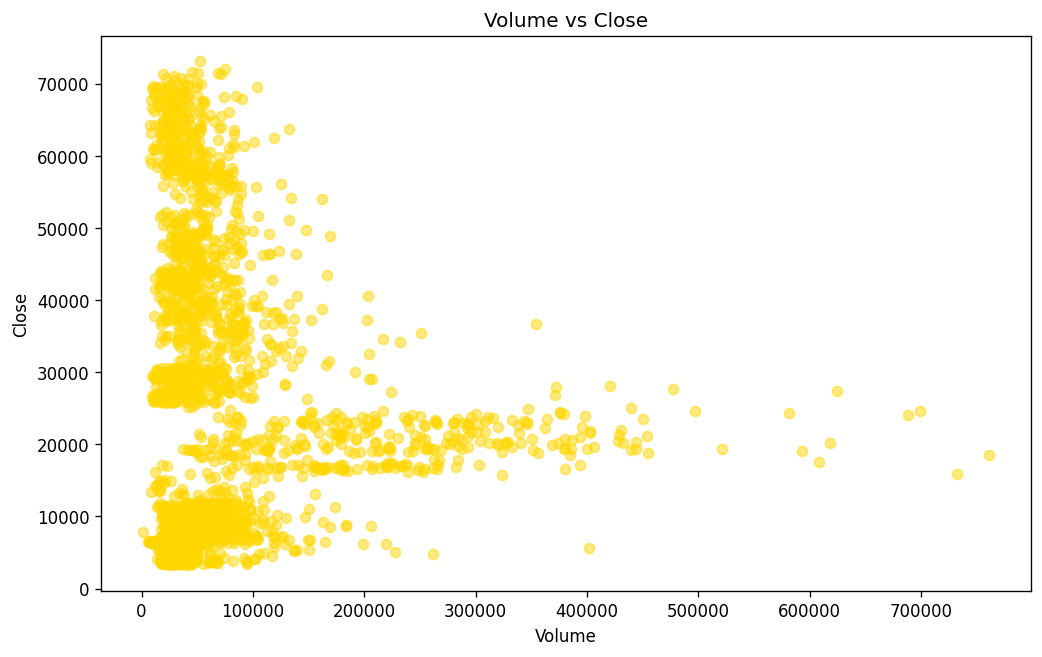

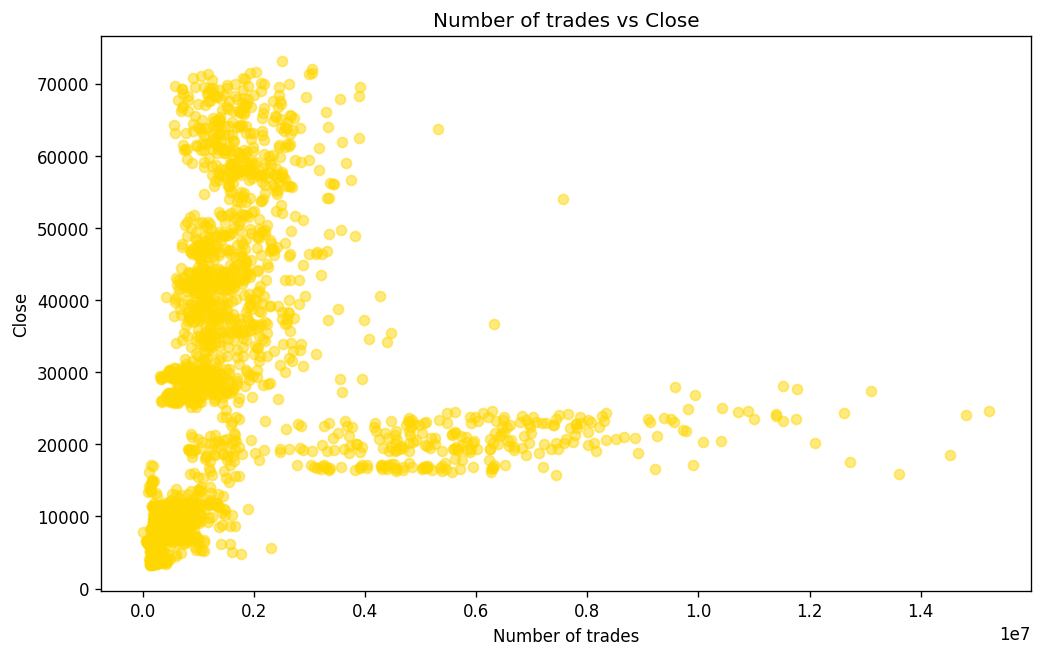

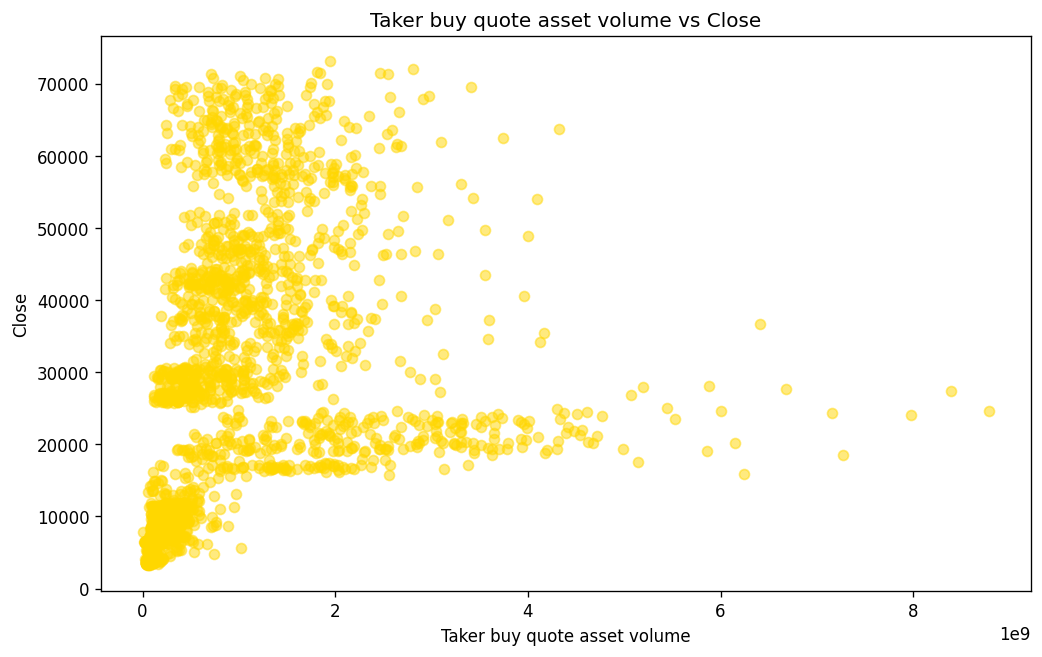

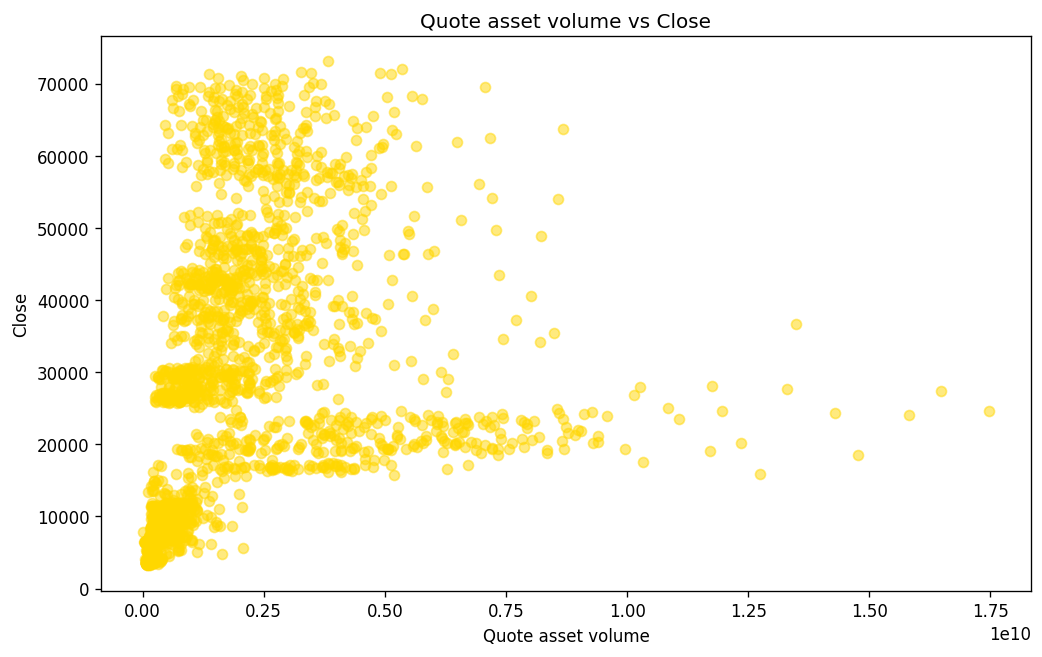

In [ ]:
# Plot each feature against the target variable
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df["Close"], color='gold', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.title(f'{feature} vs Close')
    plt.show()

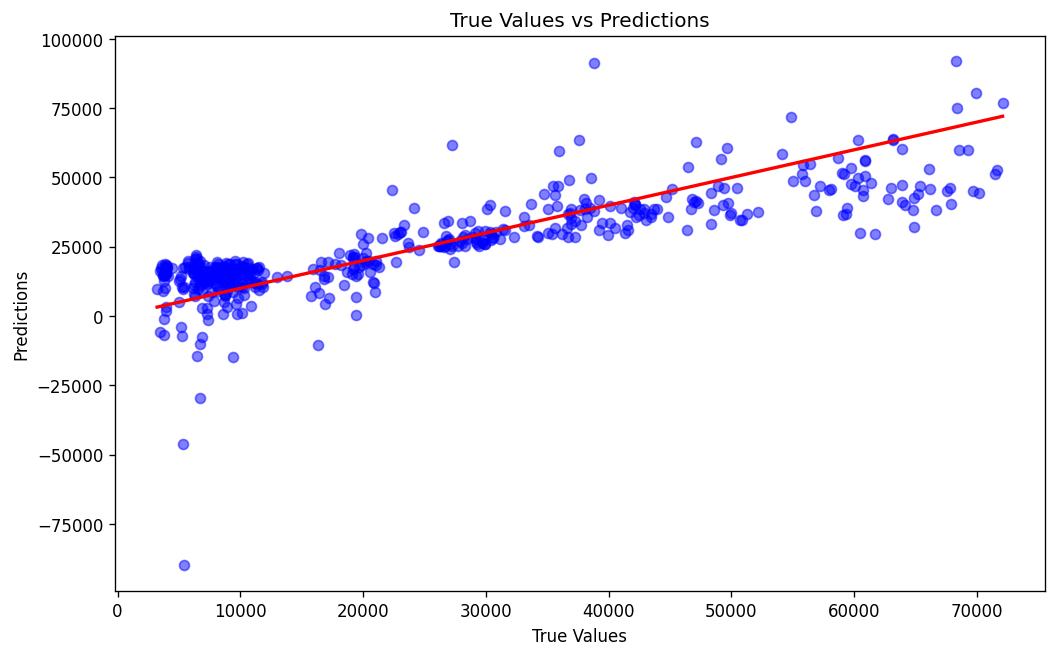

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Lặp qua từng mục tiêu và huấn luyện mô hình Random Forest
for target in targets:
    print(f"Training Random Forest model to predict {target}")

    # Lấy dữ liệu đặc trưng (X) và mục tiêu (y)
    X = df[features]
    y = df[target]

    # Bỏ các hàng có giá trị NaN (do sử dụng shift tạo ra NaN)
    valid_rows = ~y.isna()
    X, y = X[valid_rows], y[valid_rows]

    # Chuẩn hóa dữ liệu
    scaler_standard = StandardScaler()
    X_standardized = scaler_standard.fit_transform(X)

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

    # Tạo mô hình Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Huấn luyện mô hình
    rf_model.fit(X_train, y_train)

    # Dự đoán giá trị trên tập kiểm tra
    y_pred = rf_model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # In kết quả đánh giá
    print(f"Results for {target}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}\n")


Training Random Forest model to predict Close2
Results for Close2:
MSE: 4505961.821371706
RMSE: 2122.7250932166667
MAE: 1210.4223495901629
R2: 0.9875980268998379

Training Random Forest model to predict Close3
Results for Close3:
MSE: 4629139.014365406
RMSE: 2151.5434028541945
MAE: 1326.9128614754115
R2: 0.9865158057463473

Training Random Forest model to predict Close4
Results for Close4:
MSE: 6869158.509689896
RMSE: 2620.9079552113035
MAE: 1557.2052985655744
R2: 0.980683774009179

Training Random Forest model to predict Close5
Results for Close5:
MSE: 6352546.657615914
RMSE: 2520.4258881419055
MAE: 1577.880922336066
R2: 0.983065268983265

Training Random Forest model to predict Close6
Results for Close6:
MSE: 8514049.494782101
RMSE: 2917.884421080126
MAE: 1772.2980952868854
R2: 0.97727792647882



In [ ]:
# Đánh giá mô hình trên cả tập huấn luyện và tập kiểm tra
for target in targets:
    print(f"Evaluating Random Forest model for {target}")

    # Lấy dữ liệu đặc trưng (X) và mục tiêu (y)
    X = df[features]
    y = df[target]

    # Bỏ các hàng có giá trị NaN (do sử dụng shift tạo ra NaN)
    valid_rows = ~y.isna()
    X, y = X[valid_rows], y[valid_rows]

    # Chuẩn hóa dữ liệu
    scaler_standard = StandardScaler()
    X_standardized = scaler_standard.fit_transform(X)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

    # Tạo mô hình Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Huấn luyện mô hình
    rf_model.fit(X_train, y_train)

    # Dự đoán trên tập huấn luyện
    y_train_pred = rf_model.predict(X_train)

    # Dự đoán trên tập kiểm tra
    y_test_pred = rf_model.predict(X_test)

    # Đánh giá hiệu suất trên tập huấn luyện
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Đánh giá hiệu suất trên tập kiểm tra
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # In kết quả
    print(f"Training Results for {target}:")
    print(f"Train MSE: {train_mse}, Train RMSE: {train_rmse}, Train R2: {train_r2}")
    print(f"Test MSE: {test_mse}, Test RMSE: {test_rmse}, Test R2: {test_r2}")
    print("")

    # So sánh hiệu suất tập huấn luyện và tập kiểm tra
    if test_r2 < train_r2 - 0.1:  # Nếu chênh lệch R² lớn
        print(f"Potential overfitting detected for {target}.\n")


Evaluating Random Forest model for Close2
Training Results for Close2:
Train MSE: 516675.20247103606, Train RMSE: 718.8012259804765, Train R2: 0.9986219909407291
Test MSE: 4505961.821371706, Test RMSE: 2122.7250932166667, Test R2: 0.9875980268998379

Evaluating Random Forest model for Close3
Training Results for Close3:
Train MSE: 709189.674988655, Train RMSE: 842.134000613118, Train R2: 0.998132368880584
Test MSE: 4629139.014365406, Test RMSE: 2151.5434028541945, Test R2: 0.9865158057463473

Evaluating Random Forest model for Close4
Training Results for Close4:
Train MSE: 834517.9118087238, Train RMSE: 913.5195191175303, Train R2: 0.997783237087666
Test MSE: 6869158.509689896, Test RMSE: 2620.9079552113035, Test R2: 0.980683774009179

Evaluating Random Forest model for Close5
Training Results for Close5:
Train MSE: 997159.0571029887, Train RMSE: 998.5785182463063, Train R2: 0.9973189305218275
Test MSE: 6352546.657615914, Test RMSE: 2520.4258881419055, Test R2: 0.983065268983265

Evalu